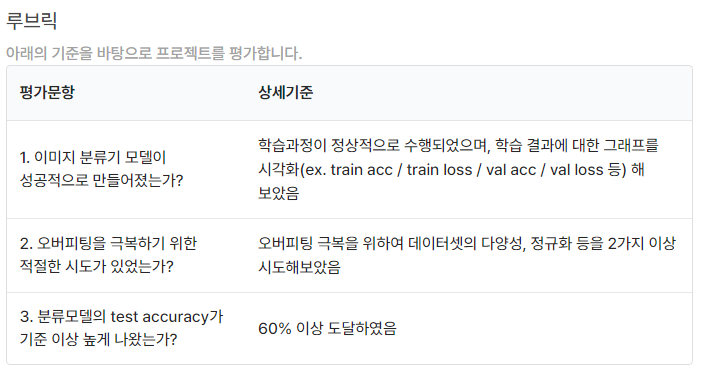

## 데이터 불러오기 + Resize 하기

In [1]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

700  images to be resized.
700  images resized.
가위 이미지 resize 완료!


In [3]:
# 바위 이미지 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

700  images to be resized.
700  images resized.
바위 이미지 resize 완료!


In [4]:
# 보 이미지 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

700  images to be resized.
700  images resized.
보 이미지 resize 완료!


In [5]:
import numpy as np

def load_data(img_path, number_of_data=2100):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"개 입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"

(X, y) = load_data(image_dir_path)

데이터의 이미지 개수는 2100 개 입니다.


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.2)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1680, 28, 28, 3)
y_train shape: (1680,)
X_test shape: (420, 28, 28, 3)
y_test shape: (420,)


라벨:  2


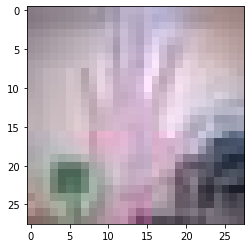

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
print('라벨: ', y_train[0])

In [8]:
print('최소값:',np.min(X_train), ' 최대값:',np.max(X_train))

최소값: 0  최대값: 255


In [9]:
x_train_norm = X_train / 255.0  # 입력은 0~1 사이의 값으로 정규화
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm)) 

최소값: 0.0  최대값: 1.0


## 딥러닝 네트워크 설계하기

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  9
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (No

## 딥러닝 네트워크 학습시키기

In [11]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")

x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")

Before Reshape - x_train_norm shape: (1680, 28, 28, 3)
After Reshape - x_train_reshaped shape: (1680, 28, 28, 3)


In [12]:
import tensorflow as tf
from tensorflow import keras

# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
# model.fit(x_train_reshaped, y_train, epochs=10)

history = model.fit(x_train_reshaped, y_train,
                    batch_size=50,
                    epochs=20,
                    validation_split=0.2)

Epoch 1/20
27/27 [==============================] - 4s 19ms/step - loss: 1.0798 - accuracy: 0.4189 - val_loss: 1.0359 - val_accuracy: 0.3661
Epoch 2/20
27/27 [==============================] - 0s 5ms/step - loss: 0.9567 - accuracy: 0.5365 - val_loss: 0.8713 - val_accuracy: 0.5446
Epoch 3/20
27/27 [==============================] - 0s 5ms/step - loss: 0.7837 - accuracy: 0.6518 - val_loss: 0.7733 - val_accuracy: 0.5536
Epoch 4/20
27/27 [==============================] - 0s 5ms/step - loss: 0.6742 - accuracy: 0.7158 - val_loss: 0.6096 - val_accuracy: 0.7768
Epoch 5/20
27/27 [==============================] - 0s 5ms/step - loss: 0.5347 - accuracy: 0.8073 - val_loss: 0.4889 - val_accuracy: 0.8065
Epoch 6/20
27/27 [==============================] - 0s 5ms/step - loss: 0.4594 - accuracy: 0.8281 - val_loss: 0.4091 - val_accuracy: 0.8452
Epoch 7/20
27/27 [==============================] - 0s 5ms/step - loss: 0.4088 - accuracy: 0.8504 - val_loss: 0.3669 - val_accuracy: 0.8839
Epoch 8/20
27/27 [=

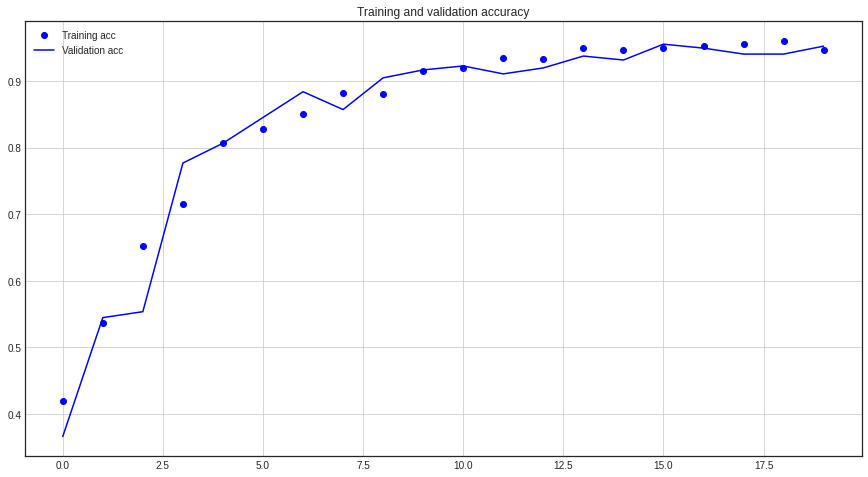

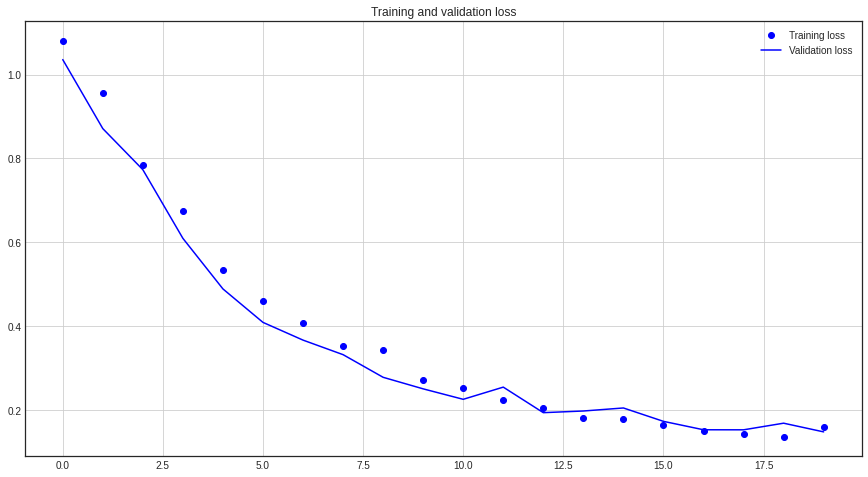

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15,8))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure(figsize=(15,8))

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()

plt.show()

## 얼마나 잘 만들었는지 확인하기(테스트)
여러분들은 300장의 가위바위보 이미지를 만들어 모두 학습에 사용했습니다. 그러므로 테스트 데이터가 없죠. 옆 친구의 이미지 데이터 300장을 받아오세요. 그리고 그것을 테스트 데이터로 하여 test accuracy를 측정해보세요. (만약 웹캠이 없는 경우 섹션을 진행하신 경우, 이미 test 데이터셋이 준비돼있으니 친구에게 조르지 않으셔도 됩니다)

우선 테스트용 데이터인 x_test, y_test를 만들어 봅시다.

In [16]:
x_test_norm = X_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_test shape: (420, 28, 28, 3)
y_test shape: (420,)


In [17]:
print('최소값:',np.min(x_test_norm), ' 최대값:',np.max(x_test_norm))

최소값: 0.0  최대값: 1.0


In [18]:
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_test_norm shape: (420, 28, 28, 3)
After Reshape - x_test_reshaped shape: (420, 28, 28, 3)


테스트용 데이터가 준비되었으니, 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정해 봅시다.

In [19]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

14/14 - 0s - loss: 0.2038 - accuracy: 0.9333
test_loss: 0.20380935072898865
test_accuracy: 0.9333333373069763


## 더 좋은 네트워크 만들어보기
시험용 데이터x_test에 대한 인식률 test accuracy가 train accuracy보다 많이 낮게 나오지는 않았나요? 만약 그렇다면 그 이유는 무엇일까요? MNIST 손글씨 데이터 때처럼 test accuracy가 train accuracy에 근접하도록 개선 방법을 찾아 봅시다.

## 회고

<헤맸던 부분>
- model.compile에서 ValueError: Data cardinality is ambiguous: x sizes: 900, y sizes: 300 에러가 났다. 실제로 shaped을 살펴보니 x_train은 300개 였는데, x_train_reshaped은 900개로 변해있었다. reshape코드 위치가 compile 다음으로 되어있어서 실행이 겹치다보니 그렇게 된거였다. 
- model.compile에서 ValueError: Input 0 of layer sequential_6 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, 28, 28, 3) 에러가 났다. 모델 구성할 때 input_shape=(28,28,3)으로 넣어줬어야하는데 흑백인 MNIST 따라 1로 넣었더니 생긴 에러였다. 
- test로 evaluate할 때도 또 ValueError: Data cardinality is ambiguous: 에러가 나왔다. 왜 resahpe된 이미지가 300개에서 900개로 늘어나는지 모르겠다. 
- 처음엔 train, test를 shuffle할 생각을 못하고 내 손을 train으로 넣고, 지영님 손을 test로 넣어 accuracy가 0.47이 나왔다. 다시 데이터를 2100개로 늘리고 split했다. 
- train, test split한 후 모델 돌리니 accuracy가 0.9대로 나왔다. 이렇게 높게 나오지 않는다는데, 뭐가 잘못 됐는지 모르겠다. test가 유출됐나?

<새롭게 알게된 부분>
- 흑백 이미지는 채널으 한 개로 쓰면 되지만, 컬러는 3개이므로 MNIST에서 코드를 따올 때 주의해야한다. 
- 모델을 일반화시키기 위해, 데이터를 잘 섞어서 train, test로 분리할 필요가 있다. 

<아직도 모르는 것>
-
